/home/ahmedelshazly/anaconda3/envs/gpu-env4/lib/python3.9/site-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 01: Train Loss = 5.0711, Val Loss = 4.2142, Val Acc = 0.0000
Epoch 02: Train Loss = 4.2421, Val Loss = 3.5671, Val Acc = 0.0000
Epoch 03: Train Loss = 3.7099, Val Loss = 3.0322, Val Acc = 0.0000
Epoch 04: Train Loss = 3.2793, Val Loss = 2.5878, Val Acc = 0.0000
Epoch 05: Train Loss = 2.8792, Val Loss = 2.2034, Val Acc = 0.0177
Epoch 06: Train Loss = 2.5111, Val Loss = 1.8716, Val Acc = 0.0796
Epoch 07: Train Loss = 2.2155, Val Loss = 1.6501, Val Acc = 0.0796
Epoch 08: Train Loss = 1.9037, Val Loss = 1.3032, Val Acc = 0.3009
Epoch 09: Train Loss = 1.6531, Val Loss = 1.0745, Val Acc = 0.3540
Epoch 10: Train Loss = 1.4042, Val Loss = 0.8730, Val Acc = 0.4779
Epoch 11: Train Loss = 1.2036, Val Loss = 0.7304, Val Acc = 0.6372
Epoch 12: Train Loss = 1.0162, Val Loss = 0.5825, Val Acc = 0.7080
Epoch 13: Train Loss = 0.8647, Val Loss = 0.4880, Val Acc = 0.7345
Epoch 14: Train Loss = 0.7456, Val Loss = 0.3903, Val Acc = 0.8496
Epoch 15: Train Loss = 0.6155, Val Loss = 0.3242, Val Acc = 0.

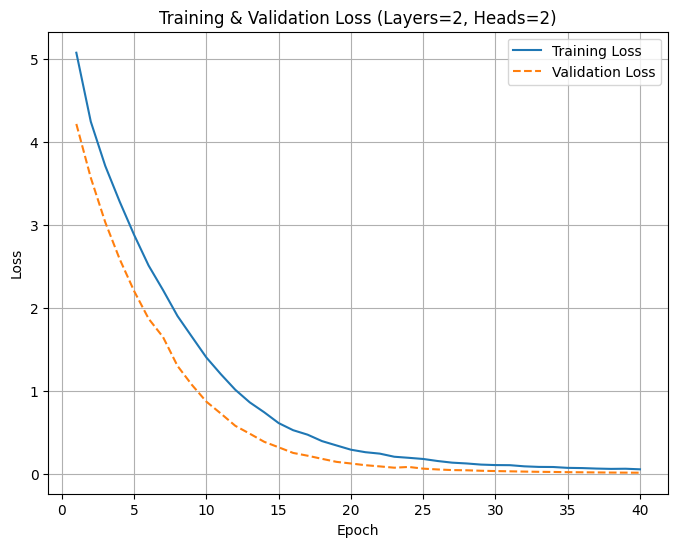

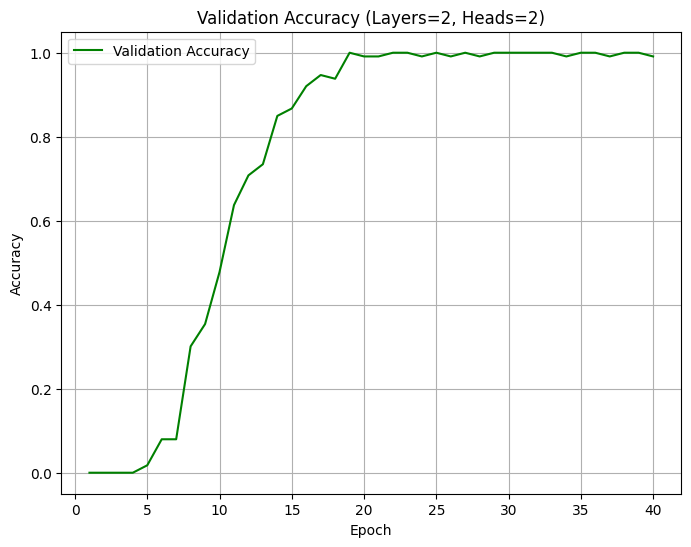

In [1]:
import math
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
import random

SOS_token = 0
EOS_token = 1

english_to_french = [
    ("I am cold", "J'ai froid"),
    ("You are tired", "Tu es fatigué"),
    ("He is hungry", "Il a faim"),
    ("She is happy", "Elle est heureuse"),
    ("We are friends", "Nous sommes amis"),
    ("They are students", "Ils sont étudiants"),
    ("The cat is sleeping", "Le chat dort"),
    ("The sun is shining", "Le soleil brille"),
    ("We love music", "Nous aimons la musique"),
    ("She speaks French fluently", "Elle parle français couramment"),
    ("He enjoys reading books", "Il aime lire des livres"),
    ("They play soccer every weekend", "Ils jouent au football chaque week-end"),
    ("The movie starts at 7 PM", "Le film commence à 19 heures"),
    ("She wears a red dress", "Elle porte une robe rouge"),
    ("We cook dinner together", "Nous cuisinons le dîner ensemble"),
    ("He drives a blue car", "Il conduit une voiture bleue"),
    ("They visit museums often", "Ils visitent souvent des musées"),
    ("The restaurant serves delicious food", "Le restaurant sert une délicieuse cuisine"),
    ("She studies mathematics at university", "Elle étudie les mathématiques à l'université"),
    ("We watch movies on Fridays", "Nous regardons des films le vendredi"),
    ("He listens to music while jogging", "Il écoute de la musique en faisant du jogging"),
    ("They travel around the world", "Ils voyagent autour du monde"),
    ("The book is on the table", "Le livre est sur la table"),
    ("She dances gracefully", "Elle danse avec grâce"),
    ("We celebrate birthdays with cake", "Nous célébrons les anniversaires avec un gâteau"),
    ("He works hard every day", "Il travaille dur tous les jours"),
    ("They speak different languages", "Ils parlent différentes langues"),
    ("The flowers bloom in spring", "Les fleurs fleurissent au printemps"),
    ("She writes poetry in her free time", "Elle écrit de la poésie pendant son temps libre"),
    ("We learn something new every day", "Nous apprenons quelque chose de nouveau chaque jour"),
    ("The dog barks loudly", "Le chien aboie bruyamment"),
    ("He sings beautifully", "Il chante magnifiquement"),
    ("They swim in the pool", "Ils nagent dans la piscine"),
    ("The birds chirp in the morning", "Les oiseaux gazouillent le matin"),
    ("She teaches English at school", "Elle enseigne l'anglais à l'école"),
    ("We eat breakfast together", "Nous prenons le petit déjeuner ensemble"),
    ("He paints landscapes", "Il peint des paysages"),
    ("They laugh at the joke", "Ils rient de la blague"),
    ("The clock ticks loudly", "L'horloge tic-tac bruyamment"),
    ("She runs in the park", "Elle court dans le parc"),
    ("We travel by train", "Nous voyageons en train"),
    ("He writes a letter", "Il écrit une lettre"),
    ("They read books at the library", "Ils lisent des livres à la bibliothèque"),
    ("The baby cries", "Le bébé pleure"),
    ("She studies hard for exams", "Elle étudie dur pour les examens"),
    ("We plant flowers in the garden", "Nous plantons des fleurs dans le jardin"),
    ("He fixes the car", "Il répare la voiture"),
    ("They drink coffee in the morning", "Ils boivent du café le matin"),
    ("The sun sets in the evening", "Le soleil se couche le soir"),
    ("She dances at the party", "Elle danse à la fête"),
    ("We play music at the concert", "Nous jouons de la musique au concert"),
    ("He cooks dinner for his family", "Il cuisine le dîner pour sa famille"),
    ("They study French grammar", "Ils étudient la grammaire française"),
    ("The rain falls gently", "La pluie tombe doucement"),
    ("She sings a song", "Elle chante une chanson"),
    ("We watch a movie together", "Nous regardons un film ensemble"),
    ("He sleeps deeply", "Il dort profondément"),
    ("They travel to Paris", "Ils voyagent à Paris"),
    ("The children play in the park", "Les enfants jouent dans le parc"),
    ("She walks along the beach", "Elle se promène le long de la plage"),
    ("We talk on the phone", "Nous parlons au téléphone"),
    ("He waits for the bus", "Il attend le bus"),
    ("They visit the Eiffel Tower", "Ils visitent la tour Eiffel"),
    ("The stars twinkle at night", "Les étoiles scintillent la nuit"),
    ("She dreams of flying", "Elle rêve de voler"),
    ("We work in the office", "Nous travaillons au bureau"),
    ("He studies history", "Il étudie l'histoire"),
    ("They listen to the radio", "Ils écoutent la radio"),
    ("The wind blows gently", "Le vent souffle doucement"),
    ("She swims in the ocean", "Elle nage dans l'océan"),
    ("We dance at the wedding", "Nous dansons au mariage"),
    ("He climbs the mountain", "Il gravit la montagne"),
    ("They hike in the forest", "Ils font de la randonnée dans la forêt"),
    ("The cat meows loudly", "Le chat miaule bruyamment"),
    ("She paints a picture", "Elle peint un tableau"),
    ("We build a sandcastle", "Nous construisons un château de sable"),
    ("He sings in the choir", "Il chante dans le chœur"),
    ("They ride bicycles", "Ils font du vélo"),
    ("The coffee is hot", "Le café est chaud"),
    ("She wears glasses", "Elle porte des lunettes"),
    ("We visit our grandparents", "Nous rendons visite à nos grands-parents"),
    ("He plays the guitar", "Il joue de la guitare"),
    ("They go shopping", "Ils font du shopping"),
    ("The teacher explains the lesson", "Le professeur explique la leçon"),
    ("She takes the train to work", "Elle prend le train pour aller au travail"),
    ("We bake cookies", "Nous faisons des biscuits"),
    ("He washes his hands", "Il se lave les mains"),
    ("They enjoy the sunset", "Ils apprécient le coucher du soleil"),
    ("The river flows calmly", "La rivière coule calmement"),
    ("She feeds the cat", "Elle nourrit le chat"),
    ("We visit the museum", "Nous visitons le musée"),
    ("He fixes his bicycle", "Il répare son vélo"),
    ("They paint the walls", "Ils peignent les murs"),
    ("The baby sleeps peacefully", "Le bébé dort paisiblement"),
    ("She ties her shoelaces", "Elle attache ses lacets"),
    ("We climb the stairs", "Nous montons les escaliers"),
    ("He shaves in the morning", "Il se rase le matin"),
    ("They set the table", "Ils mettent la table"),
    ("The airplane takes off", "L'avion décolle"),
    ("She waters the plants", "Elle arrose les plantes"),
    ("We practice yoga", "Nous pratiquons le yoga"),
    ("He turns off the light", "Il éteint la lumière"),
    ("They play video games", "Ils jouent aux jeux vidéo"),
    ("The soup smells delicious", "La soupe sent délicieusement bon"),
    ("She locks the door", "Elle ferme la porte à clé"),
    ("We enjoy a picnic", "Nous profitons d'un pique-nique"),
    ("He checks his email", "Il vérifie ses emails"),
    ("They go to the gym", "Ils vont à la salle de sport"),
    ("The moon shines brightly", "La lune brille intensément"),
    ("She catches the bus", "Elle attrape le bus"),
    ("We greet our neighbors", "Nous saluons nos voisins"),
    ("He combs his hair", "Il se peigne les cheveux"),
    ("They wave goodbye", "Ils font un signe d'adieu")
]

class TranslationDataset(Dataset):
    def __init__(self, data, word_to_index):
        self.data = data
        self.word_to_index = word_to_index

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        src_sentence, tgt_sentence = self.data[idx]
        src_tensor = torch.tensor([self.word_to_index[word] for word in src_sentence.split()] + [EOS_token], dtype=torch.long)
        tgt_tensor = torch.tensor([self.word_to_index[word] for word in tgt_sentence.split()] + [EOS_token], dtype=torch.long)
        return src_tensor, tgt_tensor

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, dropout=0.05, max_len=100):
        super().__init__()
        self.dropout = nn.Dropout(dropout)
        p = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        p[:, 0::2] = torch.sin(position * div_term)
        p[:, 1::2] = torch.cos(position * div_term)
        p = p.unsqueeze(1)
        self.register_buffer('p', p)

    def forward(self, x):
        x = x + self.p[:x.size(0)]
        return self.dropout(x)

class TransformerTranslationModel(nn.Module):
    def __init__(self, vocab_size, d_model, nhead, num_layers, dim_feedforward=512, dropout=0.05):
        super().__init__()
        self.d_model = d_model
        self.src_embedding = nn.Embedding(vocab_size, d_model)
        self.tgt_embedding = nn.Embedding(vocab_size, d_model)
        self.pos_encoder = PositionalEncoding(d_model, dropout)
        self.pos_decoder = PositionalEncoding(d_model, dropout)
        self.transformer = nn.Transformer(
            d_model=d_model, nhead=nhead,
            num_encoder_layers=num_layers,
            num_decoder_layers=num_layers,
            dim_feedforward=dim_feedforward,
            dropout=dropout
        )
        self.fc_out = nn.Linear(d_model, vocab_size)
        self.log_softmax = nn.LogSoftmax(dim=-1)

    def forward(self, src, tgt, src_mask=None, tgt_mask=None):
        src_emb = self.src_embedding(src) * math.sqrt(self.d_model)
        tgt_emb = self.tgt_embedding(tgt) * math.sqrt(self.d_model)
        src_emb = self.pos_encoder(src_emb)
        tgt_emb = self.pos_decoder(tgt_emb)
        output = self.transformer(src_emb, tgt_emb, src_mask=src_mask, tgt_mask=tgt_mask)
        output = self.fc_out(output)
        return self.log_softmax(output)

def generate_square_subsequent_mask(sz):
    mask = torch.triu(torch.ones(sz, sz), diagonal=1)
    mask = mask.masked_fill(mask == 1, float('-inf'))
    return mask

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

def train_transformer(model, input_tensor, target_tensor, optimizer, criterion):
    model.train()
    optimizer.zero_grad()

    src = input_tensor.to(device).unsqueeze(1)
    tgt = target_tensor.to(device)
    tgt_input = torch.cat([torch.tensor([word_to_index['SOS']], device=device), tgt[:-1]]).unsqueeze(1)
    tgt_mask = generate_square_subsequent_mask(tgt_input.size(0)).to(device)

    output = model(src, tgt_input, tgt_mask=tgt_mask)
    loss = criterion(output.view(-1, output.shape[-1]), tgt)
    loss.backward()
    optimizer.step()

    return loss.item()

def evaluate_transformer(model, dataloader, criterion):
    model.eval()
    total_loss = 0
    correct_sentences = 0

    with torch.no_grad():
        for input_tensor, target_tensor in dataloader:
            src = input_tensor[0].to(device).unsqueeze(1)
            tgt = target_tensor[0].to(device)
            tgt_input = torch.tensor([word_to_index['SOS']], device=device).unsqueeze(1)
            output_sentence = []

            for di in range(tgt.size(0)):
                tgt_mask = generate_square_subsequent_mask(tgt_input.size(0)).to(device)
                output = model(src, tgt_input, tgt_mask=tgt_mask)
                next_token = output[-1, 0].argmax().item()
                output_sentence.append(next_token)
                tgt_input = torch.cat([tgt_input, torch.tensor([[next_token]], device=device)], dim=0)
                if next_token == EOS_token:
                    break

            tgt_input_for_loss = torch.cat([torch.tensor([word_to_index['SOS']], device=device), tgt[:-1]]).unsqueeze(1)
            tgt_mask = generate_square_subsequent_mask(tgt_input_for_loss.size(0)).to(device)
            output_for_loss = model(src, tgt_input_for_loss, tgt_mask=tgt_mask)
            loss = criterion(output_for_loss.view(-1, output_for_loss.shape[-1]), tgt)
            total_loss += loss.item()
            if output_sentence == tgt.tolist():
                correct_sentences += 1

    return total_loss / len(dataloader), correct_sentences / len(dataloader)

# Vocabulary and data loading 
all_words = set()
for eng, fre in english_to_french:
    all_words.update(eng.split())
    all_words.update(fre.split())
all_words = sorted(list(all_words))
word_to_index = {"SOS": SOS_token, "EOS": EOS_token}
for i, word in enumerate(all_words):
    word_to_index[word] = i + 2
index_to_word = {index: word for word, index in word_to_index.items()}

dataset = TranslationDataset(english_to_french, word_to_index)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

n_layers = 2
n_heads = 2
n_epochs = 40
d_model = 256

model = TransformerTranslationModel(
    vocab_size=len(word_to_index),
    d_model=d_model,
    nhead=n_heads,
    num_layers=n_layers
).to(device)

optimizer = optim.SGD(model.parameters(), lr=0.01)
criterion = nn.NLLLoss()

# Training loop
train_losses = []
val_losses = []
val_accuracies = []

for epoch in range(n_epochs):
    model.train()
    total_train_loss = 0

    for input_tensor, target_tensor in dataloader:
        loss = train_transformer(model, input_tensor[0], target_tensor[0], optimizer, criterion)
        total_train_loss += loss

    avg_train_loss = total_train_loss / len(dataloader)
    train_losses.append(avg_train_loss)

    # Evaluation
    val_loss, val_acc = evaluate_transformer(model, dataloader, criterion)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch+1:02d}: Train Loss = {avg_train_loss:.4f}, Val Loss = {val_loss:.4f}, Val Acc = {val_acc:.4f}")

print(f"\nTotal parameters: {count_parameters(model)}")

def generate_translation(model, sentence, word_to_index, index_to_word, max_length=20):
    model.eval()
    with torch.no_grad():
        input_tensor = torch.tensor([word_to_index[word] for word in sentence.split()] + [EOS_token],
                                  dtype=torch.long, device=device).unsqueeze(1)


        target_tensor = torch.tensor([word_to_index['SOS']], dtype=torch.long, device=device).unsqueeze(1)

        decoded_words = []

        for di in range(max_length):

            tgt_mask = generate_square_subsequent_mask(target_tensor.size(0)).to(device)
            output = model(input_tensor, target_tensor, tgt_mask=tgt_mask)
            next_token = output[-1, 0].argmax().item()

            if next_token == EOS_token:
                break
            else:
                decoded_words.append(index_to_word[next_token])

            target_tensor = torch.cat([
                target_tensor,
                torch.tensor([[next_token]], device=device)
            ])

        return ' '.join(decoded_words)

# Validation sentences
validation_sentences = [
    "I am cold",
    "They are students",
    "We are students",
    "He speaks French",
    "They play music",
    "The cat is hungry",
    "The sun sets",
    "We love books",
    "She enjoys jogging",
    "He drives a car"
]

# Print translations for validation sentences
print("\nQualitative Validation:")
for sentence in validation_sentences:
    translation = generate_translation(model, sentence, word_to_index, index_to_word)
    print(f"English: {sentence.ljust(30)} -> French: {translation}")


# Plotting
plt.figure(figsize=(8, 6))
plt.plot(range(1, n_epochs+1), train_losses, label="Training Loss")
plt.plot(range(1, n_epochs+1), val_losses, label="Validation Loss", linestyle='--')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title(f"Training & Validation Loss (Layers={n_layers}, Heads={n_heads})")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(range(1, n_epochs+1), val_accuracies, label="Validation Accuracy", color='green')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title(f"Validation Accuracy (Layers={n_layers}, Heads={n_heads})")
plt.legend()
plt.grid(True)
plt.show()